In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, date, time
import time
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_excel("GG_all_final.xlsx")

In [4]:
df.index=range(0,len(df))

In [5]:
df.head()

,orderId,originLng,oroginLat,partnerId,userId,destLng,fare,distance,destLat,created_time,...,completed_at,canceled_time,canceled_at,waiting,waiting_minutes,canceled,period,weekday,month,distance_from_center
0,330392,44.4419,40.1669,NaN,61715,NaN,0.0,NaN,NaN,20:00:50,...,NaN,20:01:04,'2015-12-31 20:01:04+00',00:00:14,0.233333,1,Late_evening,Thursday,Dec,6561.521510
1,330393,44.5266,40.2074,NaN,57214,NaN,0.0,NaN,NaN,20:01:03,...,NaN,20:01:07,'2015-12-31 20:01:07+00',00:00:04,0.066667,1,Late_evening,Thursday,Dec,2597.580452
2,330394,44.4708,40.2064,NaN,61840,NaN,0.0,NaN,NaN,20:01:05,...,NaN,20:01:08,'2015-12-31 20:01:08+00',00:00:03,0.050000,1,Late_evening,Thursday,Dec,4405.891512
3,330395,44.4391,40.1679,NaN,15026,NaN,0.0,NaN,NaN,20:01:11,...,NaN,20:05:46,'2015-12-31 20:05:46+00',00:04:35,4.583333,1,Late_evening,Thursday,Dec,6753.783434
4,330396,44.4887,40.1470,NaN,63831,NaN,0.0,NaN,NaN,20:01:15,...,NaN,20:05:47,'2015-12-31 20:05:47+00',00:04:32,4.533333,1,Late_evening,Thursday,Dec,4857.980319


In [6]:
df=df[["canceled","period","weekday","month","distance_from_center"]]

In [7]:
df.head()

,canceled,period,weekday,month,distance_from_center
0,1,Late_evening,Thursday,Dec,6561.521510
1,1,Late_evening,Thursday,Dec,2597.580452
2,1,Late_evening,Thursday,Dec,4405.891512
3,1,Late_evening,Thursday,Dec,6753.783434
4,1,Late_evening,Thursday,Dec,4857.980319


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048226 entries, 0 to 1048225
Data columns (total 5 columns):
canceled                1048226 non-null int64
period                  1048226 non-null object
weekday                 1048226 non-null object
month                   1048226 non-null object
distance_from_center    1048226 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [9]:
df.index=range(0,len(df))

In [10]:
df.columns.isna()

array([False, False, False, False, False])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048226 entries, 0 to 1048225
Data columns (total 5 columns):
canceled                1048226 non-null int64
period                  1048226 non-null object
weekday                 1048226 non-null object
month                   1048226 non-null object
distance_from_center    1048226 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [12]:
df.head()

,canceled,period,weekday,month,distance_from_center
0,1,Late_evening,Thursday,Dec,6561.521510
1,1,Late_evening,Thursday,Dec,2597.580452
2,1,Late_evening,Thursday,Dec,4405.891512
3,1,Late_evening,Thursday,Dec,6753.783434
4,1,Late_evening,Thursday,Dec,4857.980319


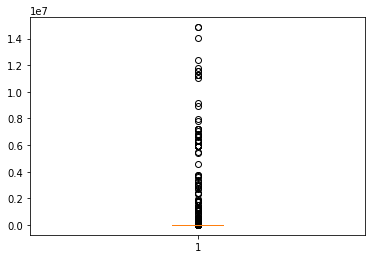

In [13]:
plt.boxplot(df["distance_from_center"])                
plt.show()

In [14]:
for i in ["distance_from_center"]:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.5)
    Q3=df[i].quantile(0.75)
    interquantile=Q3-Q1
    high=Q3+1.5* interquantile
    low=Q1-1.5*interquantile
    df=df[df[i] >= low]
    df=df[df[i] <= high]

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009141 entries, 0 to 1048225
Data columns (total 5 columns):
canceled                1009141 non-null int64
period                  1009141 non-null object
weekday                 1009141 non-null object
month                   1009141 non-null object
distance_from_center    1009141 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 46.2+ MB


In [16]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009141 entries, 0 to 1048225
Data columns (total 5 columns):
canceled                1009141 non-null int64
period                  1009141 non-null object
weekday                 1009141 non-null object
month                   1009141 non-null object
distance_from_center    1009141 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 46.2+ MB


In [17]:
data_dummies=pd.get_dummies(df[["period","weekday","month"]],drop_first=True)

In [18]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009141 entries, 0 to 1048225
Data columns (total 18 columns):
period_Evening           1009141 non-null uint8
period_Late_afternoon    1009141 non-null uint8
period_Late_evening      1009141 non-null uint8
period_Morning           1009141 non-null uint8
period_Night             1009141 non-null uint8
weekday_Monday           1009141 non-null uint8
weekday_Saturday         1009141 non-null uint8
weekday_Sunday           1009141 non-null uint8
weekday_Thursday         1009141 non-null uint8
weekday_Tuesday          1009141 non-null uint8
weekday_Wednesday        1009141 non-null uint8
month_Dec                1009141 non-null uint8
month_Feb                1009141 non-null uint8
month_Jan                1009141 non-null uint8
month_Jul                1009141 non-null uint8
month_Jun                1009141 non-null uint8
month_Mar                1009141 non-null uint8
month_May                1009141 non-null uint8
dtypes: uint8(18)
memor

In [19]:
df.head()

,canceled,period,weekday,month,distance_from_center
0,1,Late_evening,Thursday,Dec,6561.521510
1,1,Late_evening,Thursday,Dec,2597.580452
2,1,Late_evening,Thursday,Dec,4405.891512
3,1,Late_evening,Thursday,Dec,6753.783434
4,1,Late_evening,Thursday,Dec,4857.980319


In [20]:
df.index=range(0,len(df))
data_dummies.index=range(0,len(data_dummies))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009141 entries, 0 to 1009140
Data columns (total 5 columns):
canceled                1009141 non-null int64
period                  1009141 non-null object
weekday                 1009141 non-null object
month                   1009141 non-null object
distance_from_center    1009141 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.5+ MB


In [22]:
df=df.drop(["period","weekday","month"],axis=1)
df=df.join(data_dummies)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009141 entries, 0 to 1009140
Data columns (total 20 columns):
canceled                 1009141 non-null int64
distance_from_center     1009141 non-null float64
period_Evening           1009141 non-null uint8
period_Late_afternoon    1009141 non-null uint8
period_Late_evening      1009141 non-null uint8
period_Morning           1009141 non-null uint8
period_Night             1009141 non-null uint8
weekday_Monday           1009141 non-null uint8
weekday_Saturday         1009141 non-null uint8
weekday_Sunday           1009141 non-null uint8
weekday_Thursday         1009141 non-null uint8
weekday_Tuesday          1009141 non-null uint8
weekday_Wednesday        1009141 non-null uint8
month_Dec                1009141 non-null uint8
month_Feb                1009141 non-null uint8
month_Jan                1009141 non-null uint8
month_Jul                1009141 non-null uint8
month_Jun                1009141 non-null uint8
month_Mar            

In [24]:
df=df.sample(n=20000,random_state=42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 886622 to 740700
Data columns (total 20 columns):
canceled                 20000 non-null int64
distance_from_center     20000 non-null float64
period_Evening           20000 non-null uint8
period_Late_afternoon    20000 non-null uint8
period_Late_evening      20000 non-null uint8
period_Morning           20000 non-null uint8
period_Night             20000 non-null uint8
weekday_Monday           20000 non-null uint8
weekday_Saturday         20000 non-null uint8
weekday_Sunday           20000 non-null uint8
weekday_Thursday         20000 non-null uint8
weekday_Tuesday          20000 non-null uint8
weekday_Wednesday        20000 non-null uint8
month_Dec                20000 non-null uint8
month_Feb                20000 non-null uint8
month_Jan                20000 non-null uint8
month_Jul                20000 non-null uint8
month_Jun                20000 non-null uint8
month_Mar                20000 non-null uint8
month_May

In [26]:
X=df.drop("canceled",axis=1)
Y=df.canceled
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
df.canceled.value_counts()/len(df)*100

0    77.115
1    22.885
Name: canceled, dtype: float64

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 886622 to 740700
Data columns (total 19 columns):
distance_from_center     20000 non-null float64
period_Evening           20000 non-null uint8
period_Late_afternoon    20000 non-null uint8
period_Late_evening      20000 non-null uint8
period_Morning           20000 non-null uint8
period_Night             20000 non-null uint8
weekday_Monday           20000 non-null uint8
weekday_Saturday         20000 non-null uint8
weekday_Sunday           20000 non-null uint8
weekday_Thursday         20000 non-null uint8
weekday_Tuesday          20000 non-null uint8
weekday_Wednesday        20000 non-null uint8
month_Dec                20000 non-null uint8
month_Feb                20000 non-null uint8
month_Jan                20000 non-null uint8
month_Jul                20000 non-null uint8
month_Jun                20000 non-null uint8
month_Mar                20000 non-null uint8
month_May                20000 non-null uint8
dtypes: f

# Decision Tree

In [29]:
gridsearch=GridSearchCV(estimator=DecisionTreeClassifier(class_weight="balanced",random_state=42),
                                                         param_grid={'max_depth': range(3,20),
                "min_samples_leaf":range(10,200)},scoring="roc_auc",cv=5, n_jobs=-1).fit(X,Y)


In [30]:
print(gridsearch.best_params_)
best_params=list(gridsearch.best_params_.values())
print(best_params)
print(gridsearch.best_score_)

{'max_depth': 7, 'min_samples_leaf': 33}
[7, 33]
0.7166629598189618


In [31]:
tree=DecisionTreeClassifier(max_depth=best_params[0],min_samples_leaf=best_params[1],class_weight="balanced",random_state=42)
tree=tree.fit(X_train,Y_train)

In [32]:
cm_tree=pd.DataFrame(confusion_matrix(Y_test,tree.predict(X_test)),columns=["Predicted_0","Predicted_1"],index=["Real_0","Real_1"]).T
cm_tree

,Real_0,Real_1
Predicted_0,2182,371
Predicted_1,901,546


In [33]:
imp=pd.DataFrame(tree.feature_importances_,columns=['imp'],index=X.columns)

In [34]:
imp=imp.sort_values(by="imp",ascending=False)
print(imp)

                            imp
month_Jan              0.311687
month_Jul              0.269082
distance_from_center   0.158746
month_Jun              0.063144
month_Dec              0.042670
period_Evening         0.040699
period_Morning         0.024682
weekday_Wednesday      0.015221
period_Late_afternoon  0.014746
weekday_Thursday       0.014107
weekday_Tuesday        0.009044
period_Night           0.008986
weekday_Sunday         0.008673
month_Feb              0.008384
month_May              0.006209
weekday_Saturday       0.003148
period_Late_evening    0.000772
weekday_Monday         0.000000
month_Mar              0.000000


 # Logistic regression 

In [35]:
gridsearch3=GridSearchCV(LogisticRegression(class_weight="balanced",random_state=42),
                                            param_grid={"C":np.linspace(0.0001,30,10),"penalty":["l1","l2"]},
                         scoring="roc_auc",cv=5,n_jobs=-1).fit(X,Y)


In [36]:
best2=list(gridsearch3.best_params_.values())
print(best2)
print(gridsearch3.best_score_)

[3.3334222222222225, 'l1']
0.7182835977708146


In [37]:
logit=LogisticRegression(C=best2[0],class_weight="balanced",penalty=best2[1],random_state=42)
logit.fit(X_train,Y_train)

LogisticRegression(C=3.3334222222222225, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [38]:
print(pd.DataFrame(logit.predict_proba(X_test)[:5,:]))

          0         1
0  0.472668  0.527332
1  0.733397  0.266603
2  0.306261  0.693739
3  0.750514  0.249486
4  0.579511  0.420489


In [39]:
FPR,TPR,tresholds=roc_curve(Y_test,logit.predict_proba(X_test)[:,1])
roc=pd.DataFrame({'FPR' : FPR,'TPR' : TPR,'Tresholds':tresholds}, columns=["FPR","TPR","Tresholds"])
roc=roc.sort_values(by="TPR",ascending=False)
print(roc.head())

           FPR       TPR  Tresholds
1248  1.000000  1.000000   0.103346
1247  0.997729  1.000000   0.128237
1246  0.997729  0.997819   0.129480
1245  0.992540  0.997819   0.139602
1244  0.992540  0.996728   0.140206


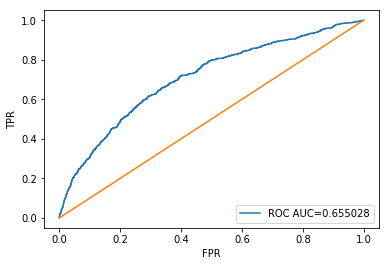

In [40]:
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(Y_test,logit.predict(X_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


# Logit Summary

In [41]:
formula="canceled~"+"+".join(X.columns)
formula

'canceled~distance_from_center+period_Evening+period_Late_afternoon+period_Late_evening+period_Morning+period_Night+weekday_Monday+weekday_Saturday+weekday_Sunday+weekday_Thursday+weekday_Tuesday+weekday_Wednesday+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May'

In [42]:
logit_summary=Logit.from_formula(formula=formula,data=df).fit()
logit_summary.summary()

Optimization terminated successfully.
         Current function value: 0.481523
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               canceled   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19980
Method:                           MLE   Df Model:                           19
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                  0.1048
Time:                        02:08:01   Log-Likelihood:                -9630.5
converged:                       True   LL-Null:                       -10758.
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5936      0.096    -27.103      0.000      -2.781      -2.406
distance_from_center      0.0002   9.69e-06     15.706      0.000       0.000       0.000
period_Evening           -0.1872      0.061     -3.089      0.002      -0.306      -0.068
period_Late_afternoon     0.0601      0.057      1.046      0.296      -0.053       0.173
period_Late_evening       0.0131      0.075      0.176      0.861      -0.133       0.159
period_Morning           -0.3857      0.062     -6.181      0.000      -0.508      -0.263
period_Night             -0.0779      0.059     -1.315      0.189      -0.194       0.038
weekday_Monday           -0.0124      0.063     -0.197      0.844      -0.136       0.111
weekday_Saturday         -0.1552      0.065     -2.386      0.017      -0.283      -0.028
weekday_Sunday            0.1380      0.064      2.158      0.031       0.013       0.263
weekday_Thursday         -0.3864      0.069     -5.609      0.000      -0.521      -0.251
weekday_Tuesday          -0.2026      0.066     -3.068      0.002      -0.332      -0.073
weekday_Wednesday        -0.0882      0.064     -1.372      0.170      -0.214       0.038
month_Dec                 4.2139      0.425      9.923      0.000       3.382       5.046
month_Feb                 0.5690      0.098      5.789      0.000       0.376       0.762
month_Jan                 2.1484      0.083     25.864      0.000       1.986       2.311
month_Jul                 1.6817      0.081     20.650      0.000       1.522       1.841
month_Jun                 1.0566      0.083     12.675      0.000       0.893       1.220
month_Mar                 0.3148      0.100      3.159      0.002       0.120       0.510
month_May                 0.4739      0.092      5.164      0.000       0.294       0.654
=========================================================================================
"""

In [43]:
# references=== April, Friday, Afternoon

In [44]:
logit_summary.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               canceled
Method:                          dydx
At:                           overall
=========================================================================================
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
distance_from_center   2.372e-05   1.48e-06     16.005      0.000    2.08e-05    2.66e-05
period_Evening           -0.0292      0.009     -3.091      0.002      -0.048      -0.011
period_Late_afternoon     0.0094      0.009      1.046      0.295      -0.008       0.027
period_Late_evening       0.0020      0.012      0.176      0.861      -0.021       0.025
period_Morning           -0.0601      0.010     -6.198      0.000      -0.079      -0.041
period_Night             -0.0122      0.009     -1.315      0.189      -0.030       0.006
weekday_Monday           -0.0019      0.010     -0.197      0.844      -0.021       0.017
weekday_Saturday         -0.0242      0.010     -2.387      0.017      -0.044      -0.004
weekday_Sunday            0.0215      0.010      2.159      0.031       0.002       0.041
weekday_Thursday         -0.0603      0.011     -5.621      0.000      -0.081      -0.039
weekday_Tuesday          -0.0316      0.010     -3.070      0.002      -0.052      -0.011
weekday_Wednesday        -0.0138      0.010     -1.372      0.170      -0.033       0.006
month_Dec                 0.6571      0.066      9.997      0.000       0.528       0.786
month_Feb                 0.0887      0.015      5.794      0.000       0.059       0.119
month_Jan                 0.3350      0.012     27.076      0.000       0.311       0.359
month_Jul                 0.2622      0.012     21.141      0.000       0.238       0.287
month_Jun                 0.1648      0.013     12.750      0.000       0.139       0.190
month_Mar                 0.0491      0.016      3.160      0.002       0.019       0.080
month_May                 0.0739      0.014      5.167      0.000       0.046       0.102
=========================================================================================
"""

# Random Forest

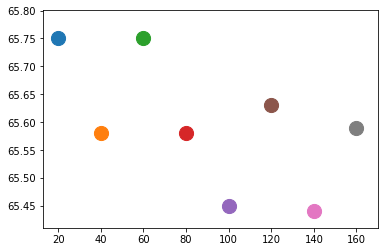

In [45]:
for i in range(20,180,20):
    RF=RandomForestClassifier(class_weight="balanced",max_depth=best_params[0],min_samples_leaf=best_params[1],n_estimators=i,
                          random_state=42).fit(X_train,Y_train)
    plt.scatter(x=i,y=roc_auc_score(Y_test,RF.predict(X_test)).round(4)*100, s=200)

In [46]:
RF=RandomForestClassifier(class_weight="balanced",max_depth=best_params[0],min_samples_leaf=best_params[1],n_estimators=60,random_state=42)
RF=RF.fit(X_train,Y_train)

In [47]:
models={"Decision Tree": tree,"Logistic Regression":logit,"Random Forest": RF}
for j,i in models.items():
    print(j,"\n")
    print("Recall_train:",(recall_score(Y_train,i.predict(X_train))).round(4)*100)
    print("Recall_test:",(recall_score(Y_test,i.predict(X_test))).round(4)*100)
    cm_train=pd.DataFrame(confusion_matrix(Y_train,i.predict(X_train))).T
    cm_test=pd.DataFrame(confusion_matrix(Y_test,i.predict(X_test))).T
    print( "Specificity train:",(cm_train.iloc[0,0]/(cm_train.iloc[0,0]+cm_train.iloc[1,0])).round(4)*100)
    print( "Specificity test:",(cm_test.iloc[0,0]/(cm_test.iloc[0,0]+cm_test.iloc[1,0])).round(4)*100)
    print("ROC_AUC_train:",(roc_auc_score(Y_train,i.predict_proba(X_train)[:, -1])).round(4)*100)
    print("ROC_AUC_test:",(roc_auc_score(Y_test,i.predict_proba(X_test)[:, -1])).round(4)*100)
    print("Train scores:",(i.score(X_train,Y_train)).round(4)*100)
    print("Test scores:",(i.score(X_test,Y_test)).round(4)*100)
    print("-------------------------------")

Decision Tree 

Recall_train: 64.51
Recall_test: 59.540000000000006
Specificity train: 72.8
Specificity test: 70.78
ROC_AUC_train: 73.95
ROC_AUC_test: 69.64
Train scores: 70.91
Test scores: 68.2
-------------------------------
Logistic Regression 

Recall_train: 64.84
Recall_test: 62.92
Specificity train: 68.82000000000001
Specificity test: 68.08
ROC_AUC_train: 72.3
ROC_AUC_test: 70.76
Train scores: 67.91
Test scores: 66.9
-------------------------------
Random Forest 

Recall_train: 61.480000000000004
Recall_test: 59.650000000000006
Specificity train: 73.08
Specificity test: 71.85000000000001
ROC_AUC_train: 73.35000000000001
ROC_AUC_test: 70.26
Train scores: 70.42
Test scores: 69.05
-------------------------------
